In [1]:
!pip install deepmol[machine-learning]

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 843.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.6/533.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
!wget -O kegg_pathways.csv --no-check-certificate "https://docs.google.com/uc?export=download&id=1wjRba9zSLLc7JPrvJZTYpg29MqdjnNhw"

--2025-03-31 13:42:01--  https://docs.google.com/uc?export=download&id=1wjRba9zSLLc7JPrvJZTYpg29MqdjnNhw
Resolving docs.google.com (docs.google.com)... 142.250.101.139, 142.250.101.100, 142.250.101.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1wjRba9zSLLc7JPrvJZTYpg29MqdjnNhw&export=download [following]
--2025-03-31 13:42:01--  https://drive.usercontent.google.com/download?id=1wjRba9zSLLc7JPrvJZTYpg29MqdjnNhw&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180700 (176K) [application/octet-stream]
Saving to: ‘kegg_pathways.csv’

kegg_pathways.csv   100%[===================>] 176.46K  --.-KB/s 

In [2]:
import pandas as pd

pd.read_csv("kegg_pathways.csv")

,Pathway,Pathway Name,Metabolite,SMILES
0,map00010,Glycolysis / Gluconeogenesis,C00022,CC(=O)C(=O)O
1,map00010,Glycolysis / Gluconeogenesis,C00024,CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(...
2,map00010,Glycolysis / Gluconeogenesis,C00031,OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O
3,map00010,Glycolysis / Gluconeogenesis,C00033,CC(=O)O
4,map00010,Glycolysis / Gluconeogenesis,C00036,O=C(O)CC(=O)C(=O)O
...,...,...,...,...
1603,map01070,Biosynthesis of plant hormones,C04691,O=C(O)C(=O)C[C@@H](O)[C@H](O)[C@H](O)COP(=O)(O)O
1604,map01070,Biosynthesis of plant hormones,C04780,CC/C=C\C[C@@H]1C(=O)CC[C@@H]1CCCCCCCC(=O)O
1605,map01070,Biosynthesis of plant hormones,C06427,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)O
1606,map01070,Biosynthesis of plant hormones,C06547,C=C


# Pre-process the Raw Data

Read the data with pandas and check how many rows (datapoints) the dataset has

In [3]:
import pandas as pd
df = pd.read_csv("kegg_pathways.csv")
print(len(df))


1608


Check how many pathways you have and which are the most common in the dataset

In [5]:

# Check how many pathways you have and which are the most common in the dataset
pathways = df['Pathway Name'].value_counts()
print(pathways)
print(len(pathways))


Pathway Name
Porphyrin metabolism                                                           145
Isoquinoline alkaloid biosynthesis                                             128
Diterpenoid biosynthesis                                                       123
Carotenoid biosynthesis                                                        120
Amino sugar and nucleotide sugar metabolism                                    109
Indole alkaloid biosynthesis                                                   102
Purine metabolism                                                               92
Tropane, piperidine and pyridine alkaloid biosynthesis                          71
Flavonoid biosynthesis                                                          66
Isoflavonoid biosynthesis                                                       60
Monoterpenoid biosynthesis                                                      59
Phenylpropanoid biosynthesis                                              

Convert the prediction endpoint (label) from strings to integers. Hint: use LabelEncoder of sklearn

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder on the 'pathway_name' column
le.fit(df['Pathway Name'])

# Transform the 'pathway_name' column to numerical labels
df['Pathway Name'] = le.transform(df['Pathway Name'])

# Print the updated DataFrame
print(df.head())


    Pathway  Pathway Name Metabolite   
0  map00010            15     C00022  \
1  map00010            15     C00024   
2  map00010            15     C00031   
3  map00010            15     C00033   
4  map00010            15     C00036   

                                              SMILES  
0                                       CC(=O)C(=O)O  
1  CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(...  
2             OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O  
3                                            CC(=O)O  
4                                 O=C(O)CC(=O)C(=O)O  


Remove the classes that have less than 10 datapoints

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Remove the classes that have less than 10 datapoints
pathway_counts = df['Pathway Name'].value_counts()
pathways_to_keep = pathway_counts[pathway_counts >= 10].index
df_filtered = df[df['Pathway Name'].isin(pathways_to_keep)]

print(len(df_filtered))
print(df_filtered['Pathway Name'].value_counts())


1597
Pathway Name
22    145
18    128
12    123
10    120
0     109
16    102
23     92
27     71
14     66
17     60
19     59
21     58
25     57
13     45
5      44
26     42
4      40
24     34
15     31
28     31
8      28
20     27
7      23
1      22
9      19
11     11
6      10
Name: count, dtype: int64


Remove all the invalid molecules (molecules than cannot be read by rdkit) and drop them

In [8]:
from rdkit import Chem

# Remove invalid molecules and replace SMILES
def clean_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            return Chem.MolToSmiles(mol)
        else:
            return None
    except:
        return None

df_filtered['SMILES'] = df_filtered['SMILES'].apply(clean_smiles)
df_filtered = df_filtered.dropna(subset=['SMILES'])
print(len(df_filtered))
print(df_filtered['Pathway Name'].value_counts())


1580
Pathway Name
22    134
18    128
12    123
10    120
0     107
16    102
23     92
27     71
14     66
17     60
19     59
25     57
21     54
13     45
5      44
26     42
4      40
24     34
15     31
28     31
8      28
20     27
7      23
1      22
9      19
11     11
6      10
Name: count, dtype: int64


<ipython-input-8-1ba147747107>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SMILES'] = df_filtered['SMILES'].apply(clean_smiles)


# Split the data

Use sklearn to obtain a stratified split of the data, generating one train, validation and test sets with ratios of 5:2:3

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into train, validation, and test sets
train_ratio = 0.5
validation_ratio = 0.2
test_ratio = 0.3

X = df_filtered.drop('Pathway Name', axis=1)
y = df_filtered['Pathway Name']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, stratify=y, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), stratify=y_test, random_state=42)

# Print the shapes of the resulting datasets
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)


(790, 3) (790,)
(316, 3) (316,)
(474, 3) (474,)


Concatenate X and y and export to a CSV file

In [10]:
# prompt: Concatenate X and y and export to a CSV file

import pandas as pd
# Concatenate x_train and y_train
train_data = pd.concat([x_train, y_train], axis=1)
train_data.to_csv('train_data.csv', index=False)

# Concatenate x_val and y_val
val_data = pd.concat([x_val, y_val], axis=1)
val_data.to_csv('val_data.csv', index=False)

# Concatenate x_test and y_test
test_data = pd.concat([x_test, y_test], axis=1)
test_data.to_csv('test_data.csv', index=False)


# Generate features

Generate morgan fingerprints using the SMILES string of each compound and rdkit package

In [11]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Function to generate Morgan fingerprints as an array of features
def generate_morgan_fingerprints(smiles, radius=2, nBits=2048):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits)
        return np.array(fp)
    else:
        return None

# Apply the function to the DataFrame
train_data['Morgan_Fingerprints'] = train_data['SMILES'].apply(generate_morgan_fingerprints)

# Convert the list of fingerprints to a 2D NumPy array
X_train = np.vstack(train_data['Morgan_Fingerprints'].values)
y_train = train_data["Pathway Name"]

# Apply the function to the DataFrame
test_data['Morgan_Fingerprints'] = test_data['SMILES'].apply(generate_morgan_fingerprints)

# Convert the list of fingerprints to a 2D NumPy array
X_test = np.vstack(test_data['Morgan_Fingerprints'].values)
y_test = test_data["Pathway Name"]

# Apply the function to the DataFrame
val_data['Morgan_Fingerprints'] = val_data['SMILES'].apply(generate_morgan_fingerprints)

# Convert the list of fingerprints to a 2D NumPy array
X_val = np.vstack(val_data['Morgan_Fingerprints'].values)
y_val = val_data["Pathway Name"]

Create new variables to generate descriptors using the SMILES string of each compound and rdkit package

In [12]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# List of descriptors to calculate
descriptor_names = [name for name, _ in Descriptors._descList]

# Function to calculate descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
        descriptors = calculator.CalcDescriptors(mol)
        return descriptors
    else:
        return [None] * len(descriptor_names)

# Apply the function to the DataFrame
df_descriptors = pd.DataFrame(train_data['SMILES'].apply(calculate_descriptors).tolist(), columns=descriptor_names)

# Convert the DataFrame to a NumPy array, dropping any rows with NaN values
X_train_descriptors = df_descriptors.to_numpy()

# Display the feature array
X_train_descriptors


array([[1.25122795e+01, 1.25122795e+01, 3.64742116e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.47916667e+00, 9.47916667e+00, 4.95370370e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.16338789e+01, 1.16338789e+01, 3.87889477e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.97287037e+00, 9.97287037e+00, 9.49074074e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.23818211e+01, 1.23818211e+01, 7.75462963e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.43582119e+01, 1.43582119e+01, 1.08326848e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [13]:
# check how many rows with nans there are in the X_train_descriptors and drop them
import pandas as pd
import numpy as np

# Count rows with NaN values in X_train_descriptors
nan_rows = np.isnan(X_train_descriptors).any(axis=1)

# drop the rows with nan
X_train_descriptors = X_train_descriptors[~nan_rows]
y_train_descriptors = y_train[~nan_rows]

# Display the feature array
X_train_descriptors


array([[1.25122795e+01, 1.25122795e+01, 3.64742116e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.47916667e+00, 9.47916667e+00, 4.95370370e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.16338789e+01, 1.16338789e+01, 3.87889477e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.97287037e+00, 9.97287037e+00, 9.49074074e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.23818211e+01, 1.23818211e+01, 7.75462963e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.43582119e+01, 1.43582119e+01, 1.08326848e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [14]:
# Apply the function to the DataFrame
df_descriptors = pd.DataFrame(val_data['SMILES'].apply(calculate_descriptors).tolist(), columns=descriptor_names)

# Convert the DataFrame to a NumPy array, dropping any rows with NaN values
X_val_descriptors = df_descriptors.to_numpy()

# Count rows with NaN values in X_val_descriptors
nan_rows = np.isnan(X_val_descriptors).any(axis=1)

# drop the rows with nan
X_val_descriptors = X_val_descriptors[~nan_rows]
y_val_descriptors = y_val[~nan_rows]

# Display the feature array
X_val_descriptors

array([[1.01050404e+01, 1.01050404e+01, 1.25866213e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37589583e+01, 1.37589583e+01, 3.37934618e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.60674225e+00, 9.60674225e+00, 3.21481481e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.22967092e+01, 1.22967092e+01, 9.70123667e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.21218544e+01, 1.21218544e+01, 3.36819837e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.36948349e+01, 1.36948349e+01, 1.02606522e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [15]:
# Apply the function to the DataFrame
df_descriptors = pd.DataFrame(test_data['SMILES'].apply(calculate_descriptors).tolist(), columns=descriptor_names)

# Convert the DataFrame to a NumPy array, dropping any rows with NaN values
X_test_descriptors = df_descriptors.to_numpy()

# Count rows with NaN values in X_test_descriptors
nan_rows = np.isnan(X_test_descriptors).any(axis=1)

# drop the rows with nan
X_test_descriptors = X_test_descriptors[~nan_rows]
y_test_descriptors = y_test[~nan_rows]

# Display the feature array
X_test_descriptors

array([[ 9.67542029,  9.67542029,  0.1577172 , ...,  0.        ,
         1.        ,  0.        ],
       [12.79805077, 12.79805077,  0.13521344, ...,  0.        ,
         0.        ,  0.        ],
       [10.53104403, 10.53104403,  0.07732175, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 4.08840601,  4.08840601,  0.35685976, ...,  0.        ,
         0.        ,  0.        ],
       [14.0064273 , 14.0064273 ,  0.09507141, ...,  0.        ,
         0.        ,  0.        ],
       [10.26004819, 10.26004819,  0.03490741, ...,  0.        ,
         0.        ,  0.        ]])

# Select features

Use the variance threshold feature selector from sklearn to select the features with higher variances

In [16]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with a threshold
selector = VarianceThreshold(threshold=0.1)  # Adjust the threshold as needed

# Fit the selector on the training data
selector.fit(X_train)

# Transform the training, validation, and test data
X_train_selected_fps = selector.transform(X_train)
X_val_selected_fps = selector.transform(X_val)
X_test_selected_fps = selector.transform(X_test)

# Print the shapes of the selected feature arrays
print("X_train_selected shape:", X_train_selected_fps.shape)
print("X_val_selected shape:", X_val_selected_fps.shape)
print("X_test_selected shape:", X_test_selected_fps.shape)


X_train_selected shape: (790, 57)
X_val_selected shape: (316, 57)
X_test_selected shape: (474, 57)


In [17]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with a threshold
selector = VarianceThreshold(threshold=0.1)  # Adjust the threshold as needed

# Fit the selector on the training data
selector.fit(X_train_descriptors)

# Transform the training, validation, and test data
X_train_selected_descriptors = selector.transform(X_train_descriptors)
X_val_selected_descriptors = selector.transform(X_val_descriptors)
X_test_selected_descriptors = selector.transform(X_test_descriptors)

# Print the shapes of the selected feature arrays
print("X_train_selected shape:", X_train_selected_descriptors.shape)
print("X_val_selected shape:", X_val_selected_descriptors.shape)
print("X_test_selected shape:", X_test_selected_descriptors.shape)


X_train_selected shape: (744, 139)
X_val_selected shape: (293, 139)
X_test_selected shape: (445, 139)


# Train models

Train and optimize a random forest using sklearn's random search class with both features

In [18]:
# prompt: Train and optimize a random forest using sklearn's random search class with both features

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution for Random Search
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [None] + list(randint(10, 100).rvs(10)),  # Include None for no max_depth
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': uniform(0.1, 0.9),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Use an appropriate scoring metric
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1
)

# Fit the model to the combined training data
random_search.fit(X_train_selected_fps, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 12, 'max_features': 0.2285801361297467, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 73}
Best score: 0.7746835443037974


In [19]:
# Evaluate the best model on the test set
best_rf = random_search.best_estimator_
test_accuracy_rf_fp = best_rf.score(X_test_selected_fps, y_test)
print(f"Test Accuracy of best model: {test_accuracy_rf_fp}")

Test Accuracy of best model: 0.7616033755274262


In [20]:
# prompt: Train and optimize a random forest using sklearn's random search class with both features

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution for Random Search
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [None] + list(randint(10, 100).rvs(10)),  # Include None for no max_depth
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': uniform(0.1, 0.9),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Use an appropriate scoring metric
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=1
)

# Fit the model to the combined training data
random_search.fit(X_train_selected_descriptors, y_train_descriptors)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 48, 'max_features': 0.2285801361297467, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 73}
Best score: 0.8548158897152186


In [22]:
# Evaluate the best model on the test set
best_rf_descriptors = random_search.best_estimator_
test_accuracy_descriptors_rf = best_rf_descriptors.score(X_test_selected_descriptors, y_test_descriptors)
print(f"Test Accuracy of best model: {test_accuracy_descriptors_rf}")

Test Accuracy of best model: 0.8449438202247191


Train and optimize a linear regression using sklearn with both features

In [23]:
# prompt: Train and optimize a logistic regression using sklearn's Randomized search with both features

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'C': uniform(0.001, 10),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # Solvers that support both penalties
}

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=100, random_state=42) # Increase max_iter if needed

# Initialize RandomizedSearchCV for Logistic Regression with combined features
random_search_logreg_fp = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,  # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all cores
    random_state=42,
    verbose=1
)


# Fit the model on morgan fingerprints
random_search_logreg_fp.fit(X_train_selected_fps, y_train)

print("Best hyperparameters (Morgan Fingerprints):", random_search_logreg_fp.best_params_)
print("Best score (Morgan Fingerprints):", random_search_logreg_fp.best_score_)

# Evaluate on the test set
best_logreg_fp = random_search_logreg_fp.best_estimator_
test_accuracy_logreg_fp = best_logreg_fp.score(X_test_selected_fps, y_test)
print(f"Test Accuracy (Morgan Fingerprints): {test_accuracy_logreg_fp}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters (Morgan Fingerprints): {'C': 1.819249672071006, 'penalty': 'l1', 'solver': 'liblinear'}
Best score (Morgan Fingerprints): 0.7924050632911392
Test Accuracy (Morgan Fingerprints): 0.7805907172995781


Compare models' performance using the accuracy metric on the test set

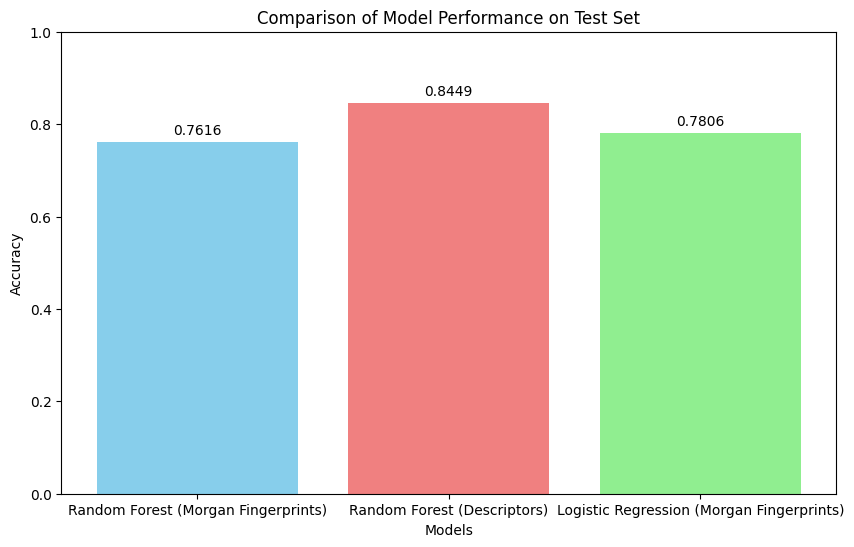

In [24]:
# prompt: Compare models' performance using the accuracy metric on the test set using a bar plot highlighting the differences between different models

import matplotlib.pyplot as plt

# Accuracy scores (replace with your actual scores)
models = ['Random Forest (Morgan Fingerprints)', 'Random Forest (Descriptors)', 'Logistic Regression (Morgan Fingerprints)']
accuracy_scores = [test_accuracy_rf_fp, test_accuracy_descriptors_rf, test_accuracy_logreg_fp]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Performance on Test Set")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Add value labels on top of each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')

plt.show()


# Alternatively, use DeepMol for a more compact implementation

In [27]:
from deepmol.loaders import CSVLoader

from deepmol.pipeline import Pipeline
from deepmol.compound_featurization import MorganFingerprint
from deepmol.feature_selection import LowVarianceFS
from deepmol.metrics import Metric
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestClassifier


# LOAD THE DATA
loader = CSVLoader('train_data.csv',
                   smiles_field='SMILES',
                   labels_fields=['Pathway Name'],
                   mode='classification')
train_dataset = loader.create_dataset(sep=",")


steps = [
         ('morgan fingerprints', MorganFingerprint(radius=2, size=1024)),
         ('low variance feature selection', LowVarianceFS(threshold=0.1)),
         ]

from deepmol.parameter_optimization import HyperparameterOptimizerCV

# Define the parameter distribution for Random Search
param_dist = {
    'n_estimators': randint(50, 100).rvs(10),
    'max_depth': [None] + list(randint(10, 100).rvs(10)),  # Include None for no max_depth
    'min_samples_split': randint(2, 20).rvs(10),
    'min_samples_leaf': randint(1, 20).rvs(10),
    'max_features': uniform(0.1, 0.9).rvs(10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
optimizer = HyperparameterOptimizerCV(RandomForestClassifier, metric=Metric(accuracy_score),
                                          maximize_metric=True,
                                          cv=5,
                                          n_iter_search=10,
                                          params_dict=param_dist,
                                          model_type="sklearn")
pipeline = Pipeline(steps=steps, path="pathway_prediction_deepmol", hpo=optimizer)
pipeline.fit(train_dataset)



MorganFingerprint: 100%|██████████| 790/790 [00:00<00:00, 974.09it/s] 
INFO:deepmol.log:MODEL TYPE: sklearn
INFO:deepmol.log:Fitting 10 random models from a space of 440000 possible models.
INFO:deepmol.log:
 
 Best <function accuracy_score at 0x7a03439bea20>: 0.800000 using {'n_estimators': 50, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 0.3488207420607029, 'max_depth': 77, 'criterion': 'entropy', 'bootstrap': False}
INFO:deepmol.log:
 <function accuracy_score at 0x7a03439bea20>: 0.705063 (0.039949) with: {'n_estimators': 62, 'min_samples_split': 5, 'min_samples_leaf': 11, 'max_features': 0.7403752635324813, 'max_depth': 76, 'criterion': 'gini', 'bootstrap': False} 

INFO:deepmol.log:
 <function accuracy_score at 0x7a03439bea20>: 0.762025 (0.011739) with: {'n_estimators': 96, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_features': 0.5732680269773796, 'max_depth': 77, 'criterion': 'gini', 'bootstrap': False} 

INFO:deepmol.log:
 <function accuracy_score at 0

In [29]:
loader = CSVLoader('test_data.csv',
                   smiles_field='SMILES',
                   labels_fields=['Pathway Name'],
                   mode='classification')
test_dataset = loader.create_dataset(sep=",")

predictions = pipeline.predict(test_dataset)
accuracy_rf_fp_deepmol = accuracy_score(test_dataset.y, predictions)
accuracy_rf_fp_deepmol

MorganFingerprint: 100%|██████████| 474/474 [00:00<00:00, 627.38it/s]


0.7848101265822784

In [31]:
pipeline.save()

In [34]:
from deepmol.loaders import CSVLoader
from deepmol.pipeline import Pipeline
from deepmol.compound_featurization import TwoDimensionDescriptors
from deepmol.feature_selection import LowVarianceFS
from deepmol.metrics import Metric
from sklearn.metrics import accuracy_score


# LOAD THE DATA
loader = CSVLoader('train_data.csv',
                   smiles_field='SMILES',
                   labels_fields=['Pathway Name'],
                   mode='classification')
train_dataset = loader.create_dataset(sep=",")


steps = [
         ('descriptors', TwoDimensionDescriptors()),
         ('low variance feature selection', LowVarianceFS()),
         ]

from deepmol.parameter_optimization import HyperparameterOptimizerCV

optimizer = HyperparameterOptimizerCV(RandomForestClassifier, metric=Metric(accuracy_score),
                                          maximize_metric=True,
                                          cv=5,
                                          n_iter_search=10,
                                          params_dict=param_dist,
                                          model_type="sklearn")
pipeline_descriptors = Pipeline(steps=steps, path="pathway_prediction_deepmol_descriptors",
                                hpo=optimizer)
pipeline_descriptors.fit(train_dataset)



TwoDimensionDescriptors:   1%|▏         | 11/790 [00:00<00:19, 39.85it/s]ERROR:deepmol.log:Failed to featurize [1*]C1=C(C)/C2=C/c3c(C(C)O)c(C)c4n3[Mg]n3c5c(c([2*])/c3=C/C1=N2)C(=O)CC=5C1=N/C(=C\4)[C@@H](C)[C@@H]1CCC(=O)O. Appending empty array
ERROR:deepmol.log:Exception message: 
TwoDimensionDescriptors:   3%|▎         | 22/790 [00:00<00:26, 28.72it/s]ERROR:deepmol.log:Failed to featurize *N[C@@H](CCC(=O)N[C@@H](CCC(=O)OP(=O)(O)O)C(=O)O)C(=O)O. Appending empty array
ERROR:deepmol.log:Exception message: 
TwoDimensionDescriptors:   5%|▌         | 41/790 [00:01<00:26, 27.80it/s]ERROR:deepmol.log:Failed to featurize CC1=C(CCC(=O)O)C2=N[C@@]1(C)CC1=C(CCC(=O)O)[C@](C)(CC(=O)O)C(=N1)/C=C1/[C@@H](CCC(=O)O)[C@](C)(CC(=O)O)[C@](C)([C@@H]3N=C(C2C)[C@](C)(CCC(=O)O)[C@H]3CC(=O)O)N1[Co+]. Appending empty array
ERROR:deepmol.log:Exception message: 
TwoDimensionDescriptors:   9%|▉         | 70/790 [00:02<00:29, 24.44it/s]ERROR:deepmol.log:Failed to featurize *C/C=C(/C)C*. Appending empty array
ERROR:

In [39]:
loader = CSVLoader('test_data.csv',
                   smiles_field='SMILES',
                   labels_fields=['Pathway Name'],
                   mode='classification')
test_dataset = loader.create_dataset(sep=",")

predictions = pipeline_descriptors.predict(test_dataset, return_invalid=True)

TwoDimensionDescriptors:   2%|▏         | 11/474 [00:00<00:08, 51.60it/s]ERROR:deepmol.log:Failed to featurize *SC(=O)CC(=O)CC(=O)CC(=O)CC(=O)CC(=O)CC(=O)CC(=O)CC(=O)CC(C)=O. Appending empty array
ERROR:deepmol.log:Exception message: 
TwoDimensionDescriptors:   4%|▎         | 17/474 [00:00<00:08, 51.34it/s]ERROR:deepmol.log:Failed to featurize *[C@H](N)C(=O)N[C@@H](*)C(=O)N[C@@H](CSC/C=C(\C)CC/C=C(\C)CCC=C(C)C)C(=O)O. Appending empty array
ERROR:deepmol.log:Exception message: 
TwoDimensionDescriptors:   5%|▍         | 23/474 [00:00<00:09, 49.64it/s]ERROR:deepmol.log:Failed to featurize CC1=C(CCC(=O)O)/C2=C/c3c(CCC(=O)O)c(C)c4n3[Fe]N3/C(=C\C1=N2)[C@@H](CCC(=O)O)[C@](C)(CC(=O)O)/C3=C/C1=N/C(=C\4)[C@@](C)(CC(=O)O)[C@@H]1CCC(=O)O. Appending empty array
ERROR:deepmol.log:Exception message: 
TwoDimensionDescriptors:  11%|█         | 53/474 [00:01<00:09, 42.16it/s]ERROR:deepmol.log:Failed to featurize C/C1=C2/N=C(/C=C3\N=C(/C(C)=C4/[C@@H](CCC(N)=O)[C@](C)(CC(N)=O)[C@](C)(C5N=C1[C@](C)(CCC(=O)

In [41]:
# remove nan from predictions
nan_rows = np.isnan(predictions)

accuracy_rf_descriptors_deepmol = accuracy_score(test_dataset.y[~nan_rows],
                                                 predictions[~nan_rows])
accuracy_rf_descriptors_deepmol

0.8404494382022472

In [42]:
pipeline_descriptors.save()

# Now use DeepMol AutoML and compare with your models

In [43]:
from deepmol.loaders import CSVLoader
from deepmol.metrics import Metric
from deepmol.pipeline_optimization import PipelineOptimization
from deepmol.splitters import RandomSplitter
from sklearn.metrics import accuracy_score
import optuna

# LOAD THE DATA
loader = CSVLoader('train_data.csv',
                   smiles_field='SMILES',
                   labels_fields=['Pathway Name'],
                   mode='classification')
train_dataset = loader.create_dataset(sep=",")

loader = CSVLoader('val_data.csv',
                   smiles_field='SMILES',
                   labels_fields=['Pathway Name'],
                   mode='classification')
validation_dataset = loader.create_dataset(sep=",")

# OPTIMIZE THE PIPELINE
po = PipelineOptimization(direction='maximize', study_name='pathway_prediction', sampler=optuna.samplers.TPESampler(seed=42),
                          storage='sqlite:///my_experience.db')
metric = Metric(accuracy_score)
po.optimize(train_dataset=train_dataset, test_dataset=validation_dataset, objective_steps='sklearn',
            metric=metric, n_trials=10, data=train_dataset, save_top_n=2, trial_timeout=60)

/usr/local/lib/python3.11/dist-packages/deepmol/pipeline_optimization/_featurizer_objectives.py:15: UserWarning: Mol2Vec featurizer not available. If you want to use it install it, please.
  warnings.warn("Mol2Vec featurizer not available. If you want to use it install it, please.")
[14:02:29] Initializing Normalizer
[I 2025-03-31 14:02:36,936] A new study created in RDB with name: pathway_prediction
MorganFingerprint:   0%|          | 0/790 [00:01<?, ?it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  15   43   47   59   63   71   72   85   97  122  124  154  199  211
  215  219  230  236  256  261  265  272  275  278  279  288  290  291
  317  323  330  337  355  365  373  382  388  390  397  402  420  427
  429  434  435  450  459  460  484  496  499  505  518  526  530  558
  571  575  594  596  616  625  634  635  645  647  653  658  659  660
  681  683  698  700  701  704  709  710  714  729  730  744  75

No neighbors found for test samples array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  17,  18,  19,  20,  21,  22,  23,  24,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  64,  65,  66,  67,  68,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 102, 103, 104, 105, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 130, 131, 132, 133, 134, 135, 136, 139, 141, 142, 143, 144,
       145, 146, 149, 150, 151, 152, 154, 156, 157, 158, 159, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 191, 192, 193, 1

INFO:deepmol.log:Standardizer CustomStandardizer initialized with 1 jobs.
MHFP:   0%|          | 0/790 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/deepmol/compound_featurization/_mhfp.py:305: UserWarning: The length of the shingling is 0, which results in an empty set and an all zero folded fingerprint.
  warnings.warn(
MHFP:   0%|          | 0/790 [00:07<?, ?it/s]
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/boruta/boruta_py.py", line 475, in _get_imp
    self.estimator.fit(X, y)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 489, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 74, in __call__
    return super().__call__(iterable_wit

Please check your X and y variable. The provided estimator cannot be fitted to your data.
'Timed Out'


RDKFingerprint:   0%|          | 0/316 [00:06<?, ?it/s]
[I 2025-03-31 14:04:25,131] Trial 4 finished with value: 0.4620253164556962 and parameters: {'1D_featurizer': 'rdk', 'fpSize': 2048, 'min_path': 3, 'max_path': 10, 'feature_selector': 'percentil_fs', 'percentile': 94, 'multiclass_model': 'gaussian_nb_model', 'standardizer': 'pass_through_standardizer'}. Best is trial 4 with value: 0.4620253164556962.
INFO:deepmol.log:Standardizer BasicStandardizer initialized with 1 jobs.
AtomPairFingerprint:   0%|          | 0/316 [00:00<?, ?it/s]
[I 2025-03-31 14:04:27,141] Trial 5 finished with value: 0.7151898734177216 and parameters: {'1D_featurizer': 'atom_pair', 'nBits': 1024, 'minLength': 2, 'maxLength': 40, 'feature_selector': 'percentil_fs', 'percentile': 27, 'multiclass_model': 'extra_tree_classifier_model', 'criterion_extra_tree': 'entropy', 'standardizer': 'basic_standardizer'}. Best is trial 5 with value: 0.7151898734177216.
INFO:deepmol.log:Standardizer BasicStandardizer initialized

In [44]:
# LOAD THE DATA
loader = CSVLoader('test_data.csv',
                   smiles_field='SMILES',
                   labels_fields=['Pathway Name'],
                   mode='classification')
test_dataset = loader.create_dataset(sep=",")

predictions = po.best_pipeline.predict(test_dataset)

accuracy_score(test_dataset.y, predictions)

MixedFeaturizer:   0%|          | 0/474 [00:04<?, ?it/s]


0.8860759493670886

# Choose one of the models and make predictions for a larger dataset

In [45]:
!wget -O coconut_dataset.csv --no-check-certificate "https://docs.google.com/uc?export=download&id=1csWReIE49fUdLrv7LHYFE7AUrxIJ9EAs"

--2025-03-31 14:06:13--  https://docs.google.com/uc?export=download&id=1csWReIE49fUdLrv7LHYFE7AUrxIJ9EAs
Resolving docs.google.com (docs.google.com)... 142.250.101.138, 142.250.101.113, 142.250.101.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1csWReIE49fUdLrv7LHYFE7AUrxIJ9EAs&export=download [following]
--2025-03-31 14:06:13--  https://drive.usercontent.google.com/download?id=1csWReIE49fUdLrv7LHYFE7AUrxIJ9EAs&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15976313 (15M) [application/octet-stream]
Saving to: ‘coconut_dataset.csv’

coconut_dataset.csv 100%[===================>]  15.24M  33.9MB

In [47]:
# LOAD THE DATA
loader = CSVLoader('coconut_dataset.csv',
                   smiles_field='canonical_smiles')
coconut_dataset_deepmol_dataset = loader.create_dataset(sep=",")

In [63]:
import pandas as pd

coconut_dataset = pd.read_csv("coconut_dataset.csv")
coconut_dataset

,id,identifier,canonical_smiles,standard_inchi,standard_inchi_key,name,iupac_name,annotation_level,total_atom_count,heavy_atom_count,...,murcko_framework,np_likeness,chemical_class,chemical_sub_class,chemical_super_class,direct_parent_classification,np_classifier_pathway,np_classifier_superclass,np_classifier_class,np_classifier_is_glycoside
0,675225,CNP0194087.3,C=C1C(=O)O[C@@H]2[C@H]3C(C)=C(O)C(=O)[C@H]3[C@...,"InChI=1S/C20H24O7/c1-6-8(2)18(23)26-11-7-20(5,...",PTQURJSSVZYXNH-QICRIBIQSA-N,NaN,"[(3~{a}~{R},4~{R},6~{R},6~{a}~{R},9~{a}~{R},9~...",2,51,27,...,O1CCC2CCCC3CC=CC3C12,2.99,Prenol lipids,Terpene lactones,Lipids and lipid-like molecules,Guaianolides and derivatives,Terpenoids,Sesquiterpenoids,Guaiane sesquiterpenoids,False
1,19839,CNP0077749.0,C=NN1OC=C2N=CC=C21,InChI=1S/C6H5N3O/c1-7-9-6-2-3-8-5(6)4-10-9/h2-...,BGHWULUNNVIRCL-UHFFFAOYSA-N,NaN,"~{N}-pyrrolo[3,2-c]isoxazol-1-ylmethanimine",1,15,10,...,N1=CC=C2NOC=C12,-0.58,Azoles,Isoxazoles,Organoheterocyclic compounds,Isoxazoles,Alkaloids,NaN,NaN,False
2,200427,CNP0299490.1,COCCCNC(=O)C1=CC=CC=C1N1C(=O)N2CCC3=C(NC4=CC=C...,InChI=1S/C26H28N4O5/c1-26-22-17(19-15-16(35-3)...,XDZXPZIASBYJFE-SANMLTNESA-N,STL537573,"2-[(2~{S})-12-methoxy-2-methyl-3,5-dioxo-4,6,1...",2,63,35,...,c1ccc(cc1)N2CN3CCc4c5ccccc5[nH]c4C3C2,-0.64,Indoles and derivatives,Pyridoindoles,Organoheterocyclic compounds,Beta carbolines,Alkaloids,Tryptophan alkaloids,Carboline alkaloids,False
3,209956,CNP0387685.0,COC1=CC=C(OC)C(C=C2OC3=CC(OCC(=O)N4CCC(C(=O)O)...,InChI=1S/C25H25NO8/c1-31-17-4-6-20(32-2)16(11-...,LRPGQHXRHMSCMB-UHFFFAOYSA-N,NaN,"1-[2-[2-[(2,5-dimethoxyphenyl)methylene]-3-oxo...",2,59,34,...,O1c2cc(OCCN3CCCCC3)ccc2CC1=Cc4ccccc4,-0.76,Aurone flavonoids,Aurone flavonoids,Phenylpropanoids and polyketides,Aurone flavonoids,NaN,NaN,NaN,False
4,223682,CNP0375958.0,COC1=CC(C2CC(=O)OC3=C2C(=O)N(CCC2=CC=C(O)C=C2)...,InChI=1S/C25H25NO7/c1-14-10-19-23(25(30)26(14)...,RTTYADRUJGDRJY-UHFFFAOYSA-N,STL544873,"4-(4-hydroxy-3,5-dimethoxy-phenyl)-6-[2-(4-hyd...",3,58,33,...,O1C=2C=CN(CC2C(c3ccccc3)CC1)CCc4ccccc4,0.11,Pyranopyridines,Pyranopyridines,Organoheterocyclic compounds,Pyranopyridines,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,210642,CNP0387086.0,COC1=CC=CC=C1N1C(=O)NC(O)=C(C2NCCC3=C2NC2=CC=C...,InChI=1S/C22H20N4O4/c1-30-16-9-5-4-8-15(16)26-...,HSPFURMAJHHXPC-UHFFFAOYSA-N,"6-hydroxy-3-(2-methoxyphenyl)-5-(2,3,4,9-tetra...","6-hydroxy-3-(2-methoxyphenyl)-5-(2,3,4,9-tetra...",1,50,30,...,c1ccc(cc1)N2CNC=C(C2)C3NCCc4c5ccccc5[nH]c43,-0.23,Harmala alkaloids,Harmala alkaloids,Alkaloids and derivatives,Harmala alkaloids,Alkaloids,Tryptophan alkaloids,Carboline alkaloids,False
19995,210670,CNP0387128.1,COC1=CC=CC=C1CN1C(=O)[C@@H]2C(C(C)O)NC3(C(=O)N...,InChI=1S/C23H23N3O5/c1-12(27)19-17-18(23(25-19...,KFVSZFOJGLIEBA-KLFHCSGLSA-N,STL531072,"(3~{a}~{R},6~{a}~{S})-1-(1-hydroxyethyl)-5-[(2...",2,54,31,...,c1ccc(cc1)CN2CC3CNC4(c5ccccc5NC4)C3C2,-0.27,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",Organic acids and derivatives,Alpha amino acids,Alkaloids,Tryptophan alkaloids,Simple oxindole alkaloids,False
19996,210694,CNP0141924.0,O=C1C=C(C2=CC=CC=C2)C2=C(O)C=C(O)C=C2O1,InChI=1S/C15H10O4/c16-10-6-12(17)15-11(9-4-2-1...,HUQKUJNSVHEHIH-UHFFFAOYSA-N,7758-73-8,"5,7-dihydroxy-4-phenyl-chromen-2-one",3,29,19,...,O1c2ccccc2C(=CC1)c3ccccc3,0.92,Neoflavonoids,Neoflavones,Phenylpropanoids and polyketides,Neoflavones,Shikimates and Phenylpropanoids,Flavonoids,Neoflavonoids,False
19997,210762,CNP0230430.0,CC(=O)COC1=CC=C2C(=O)C(=CC3=CC=C4OCOC4=C3)OC2=C1,InChI=1S/C19H14O6/c1-11(20)9-22-13-3-4-14-16(8...,DUOJKHPJQQSIOJ-UHFFFAOYSA-N,NaN,"6-acetonyloxy-2-(1,3-benzodioxol-5-ylmethylene...",1,39,25,...,O1c2ccccc2CC1=Cc3ccc4OCOc4c3,-0.22,Aurone flavonoids,Aurone flavonoids,Phenylpropanoids and polyketides,Aurone flavonoids,Shikimates and Phenylpropanoids,Flavonoids,Aurones,False


In [48]:
predictions = po.best_pipeline.predict(coconut_dataset_deepmol_dataset, return_invalid=True)

MixedFeaturizer:   0%|          | 0/19999 [02:58<?, ?it/s]


In [61]:
predictions_labels = le.inverse_transform(predictions.astype(int))
predictions_labels

array(['Monoterpenoid biosynthesis', 'Purine metabolism',
       'Indole alkaloid biosynthesis', ..., 'Isoflavonoid biosynthesis',
       'Biosynthesis of phenylpropanoids', 'Indole alkaloid biosynthesis'],
      dtype=object)

In [64]:
# prompt: create a new dataframe with the predictions and ids of the molecule

import pandas as pd

# Assuming 'predictions' and 'test_df' are defined from the previous code
# Create a DataFrame with predictions and IDs
results_df = pd.DataFrame({'MoleculeID': coconut_dataset['identifier'],
                           "smiles": coconut_dataset['canonical_smiles'],
                           'Prediction': predictions_labels})

# Display the DataFrame
results_df


,MoleculeID,smiles,Prediction
0,CNP0194087.3,C=C1C(=O)O[C@@H]2[C@H]3C(C)=C(O)C(=O)[C@H]3[C@...,Monoterpenoid biosynthesis
1,CNP0077749.0,C=NN1OC=C2N=CC=C21,Purine metabolism
2,CNP0299490.1,COCCCNC(=O)C1=CC=CC=C1N1C(=O)N2CCC3=C(NC4=CC=C...,Indole alkaloid biosynthesis
3,CNP0387685.0,COC1=CC=C(OC)C(C=C2OC3=CC(OCC(=O)N4CCC(C(=O)O)...,Biosynthesis of phenylpropanoids
4,CNP0375958.0,COC1=CC(C2CC(=O)OC3=C2C(=O)N(CCC2=CC=C(O)C=C2)...,Isoquinoline alkaloid biosynthesis
...,...,...,...
19994,CNP0387086.0,COC1=CC=CC=C1N1C(=O)NC(O)=C(C2NCCC3=C2NC2=CC=C...,Indole alkaloid biosynthesis
19995,CNP0387128.1,COC1=CC=CC=C1CN1C(=O)[C@@H]2C(C(C)O)NC3(C(=O)N...,Indole alkaloid biosynthesis
19996,CNP0141924.0,O=C1C=C(C2=CC=CC=C2)C2=C(O)C=C(O)C=C2O1,Isoflavonoid biosynthesis
19997,CNP0230430.0,CC(=O)COC1=CC=C2C(=O)C(=CC3=CC=C4OCOC4=C3)OC2=C1,Biosynthesis of phenylpropanoids
